In [410]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'ChallengingProject.pdf',
 'dataset',
 'YANG SUNGMIN (2020005723)_ Challenging Project.ipynb']

In [3]:
os.listdir('dataset')

['TML04_Dis.txt',
 'TML05_Dis.txt',
 'TML06_Dis.txt',
 'TML07_Dis.txt',
 'TML09_Dis.txt',
 'TML10_Dis.txt',
 'TML11_Dis.txt',
 'TML12_Dis.txt',
 'TML13_Dis.txt',
 'TML14_Dis.txt',
 'TML15_Dis.txt',
 'TML16_Dis.txt',
 'TML18_Dis.txt',
 'TML19_Dis.txt',
 'TML20_Dis.txt',
 'TML21_Dis.txt',
 'TML22_Dis.txt',
 'TML23_Dis.txt',
 'TML24_Dis.txt',
 'TML25_Dis.txt',
 'TML26_Dis.txt',
 'TML27_Dis.txt',
 'TML28_Dis.txt',
 'TML29_Dis.txt']

# Task 1

In [4]:
TML16 = pd.read_csv('dataset/TML16_Dis.txt', sep='\t', header=None)
TML16.columns = ['Block', 'Trial', 'f1 (Hz)', 'ISI 1', 'f2 (Hz)', 'ISI 2', 
                 'Decision', 'time', 'ISI 3']

TML16

,Block,Trial,f1 (Hz),ISI 1,f2 (Hz),ISI 2,Decision,time,ISI 3
0,1,1,15.0,4.5,13.0,5,after,0.457,3
1,1,2,15.0,4.5,18.0,5,before,0.420,3
2,1,3,15.0,6.5,14.0,3,before,0.400,5
3,1,4,15.0,4.5,10.0,5,before,0.436,3
4,1,5,19.0,6.5,15.0,3,after,0.055,5
...,...,...,...,...,...,...,...,...,...
95,10,6,15.0,6.5,11.0,3,before,0.371,5
96,10,7,15.0,3.5,17.0,6,after,0.439,2
97,10,8,12.0,6.5,15.0,3,after,0.522,5
98,10,9,18.0,7.5,15.0,2,before,0.638,6


Text(0.5, 1.0, 'TML16')

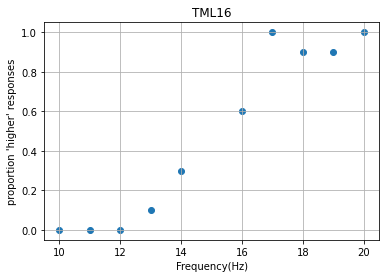

In [5]:
High_rate = []

for freq in range(10, 21):
    
    if (freq == 15):
        continue
    
    else:
        cnt = 0
        decisions = list(TML16[TML16['f1 (Hz)']==freq]['Decision'])
        cnt += decisions.count('before')
        decisions = list(TML16[TML16['f2 (Hz)']==freq]['Decision'])
        cnt += decisions.count('after')
        
        High_rate.append(cnt/10)
        
x = [i for i in range(10,21) if i!=15]
y = High_rate

plt.scatter(x, y)
plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('proportion \'higher\' responses')
plt.title('TML16')

### make function of Task 1

In [6]:
def Task1(file):
    
    df = pd.read_csv('dataset/{}'.format(file), sep='\t', header=None)
    df.columns = ['Block', 'Trial', 'f1 (Hz)', 'ISI 1', 'f2 (Hz)', 'ISI 2', 
                 'Decision', 'time', 'ISI 3']
    
    High_rate = []

    for freq in range(10, 21):
        
        if (freq == 15):
            continue
    
        else:
            cnt = 0
            decisions = list(df[df['f1 (Hz)']==freq]['Decision'])
            cnt += decisions.count('before')
            decisions = list(df[df['f2 (Hz)']==freq]['Decision'])
            cnt += decisions.count('after')
    
            High_rate.append(cnt/10)
        
    x = [i for i in range(10,21) if i!=15]
    y = High_rate

    
    
    index = int(file.split('_')[0][-2::])
    plt.subplot(29, 1, index)
    
    
    
    plt.scatter(x, y)
    plt.grid()
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('proportion \'higher\' responses')
    plt.title(file.split('_')[0])

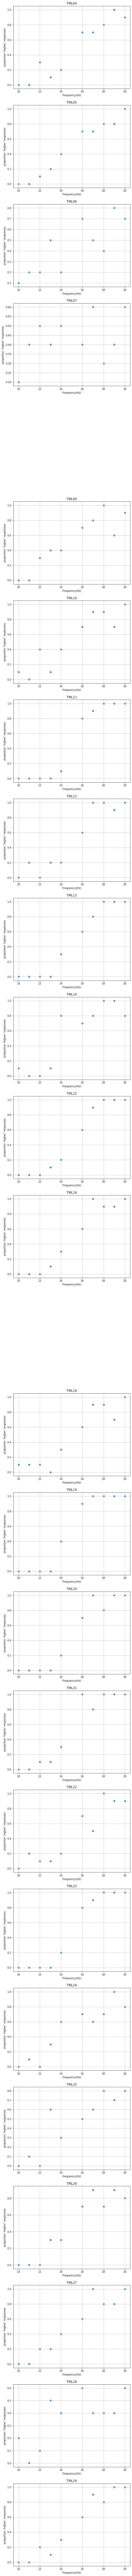

In [7]:
plt.figure(figsize=(8,200))

files = os.listdir('dataset')

for file in files:
    Task1(file)

# Task 2

Text(0, 0.5, 'α')

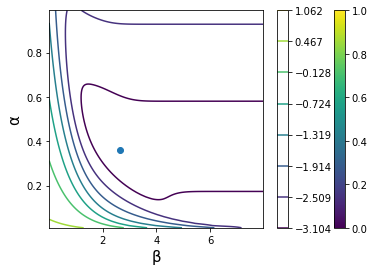

In [414]:
# TML16

x = np.array([i-15 for i in range(10,21)])
g = 0.5

y = []

for freq in range(10, 21):
    
    if (freq == 15):
        y.append(g)
    
    else:
        cnt = 0
        decisions = list(TML16[TML16['f1 (Hz)']==freq]['Decision'])
        cnt += decisions.count('before')
        decisions = list(TML16[TML16['f2 (Hz)']==freq]['Decision'])
        cnt += decisions.count('after')
    
        y.append(cnt/10)

y = np.array(y)        
        
        
        
        
def f(x, A, B):
    
    value = []
    
    for i in range(A.shape[0]):
        tmp = []
        for j in range(A.shape[1]):
            
            a = A[i,j]
            b = B[i,j]
            
            if (x < 0):
                tmp.append(g*math.exp(-a*(-x)**b))
            if (x == 0):
                tmp.append(g)
            if (x > 0):
                tmp.append(1-(1-g)*math.exp(-a*x**b))
    
        value.append(tmp)
        
    value = np.array(value)
    return value

    
def sse(N, A, B):
    
    sse = np.zeros_like(A)
    
    for i in range(len(x)):
        sse = sse + (f(x[i],A,B) - y[i])**2
        
    return sse
        
a = np.linspace(0,1,100, endpoint=False)[1:]
b = np.round(np.linspace(0,8,800, endpoint=False)[1:],4)

A, B = np.meshgrid(a, b)

Z = np.log(sse(len(x), A, B))


a_optimal = A.reshape(A.size,)[np.argmin(Z)]
b_optimal = B.reshape(B.size,)[np.argmin(Z)]

t = (np.max(Z) - np.min(Z))
plt.contour(B, A, Z, levels = np.linspace(np.min(Z)+t/10,np.max(Z)+t/8,8))
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm))
plt.colorbar()

plt.scatter(b_optimal, a_optimal)
plt.xlabel('\u03B2', fontsize=15)
plt.ylabel('\u03B1', fontsize=15)

### make function of Task 2

In [423]:
def Task2(file):
    
    df = pd.read_csv('dataset/{}'.format(file), sep='\t', header=None)
    df.columns = ['Block', 'Trial', 'f1 (Hz)', 'ISI 1', 'f2 (Hz)', 'ISI 2', 
                 'Decision', 'time', 'ISI 3']
    
    x = np.array([i-15 for i in range(10,21)])
    g = 0.5

    y = []

    for freq in range(10, 21):
    
        if (freq == 15):
            y.append(g)
    
        else:
            cnt = 0
            decisions = list(df[df['f1 (Hz)']==freq]['Decision'])
            cnt += decisions.count('before')
            decisions = list(df[df['f2 (Hz)']==freq]['Decision'])
            cnt += decisions.count('after')
    
            y.append(cnt/10)

    y = np.array(y)        
        
        
        
        
    def f(x, A, B):
    
        value = []
    
        for i in range(A.shape[0]):
            tmp = []
            for j in range(A.shape[1]):
            
                a = A[i,j]
                b = B[i,j]
            
                if (x < 0):
                    tmp.append(g*math.exp(-a*(-x)**b))
                if (x == 0):
                    tmp.append(g)
                if (x > 0):
                    tmp.append(1-(1-g)*math.exp(-a*x**b))
    
            value.append(tmp)
        
        value = np.array(value)
        return value

    
    def sse(N, A, B):
    
        sse = np.zeros_like(A)
    
        for i in range(len(x)):
            sse = sse + (f(x[i],A,B) - y[i])**2
        
        return sse
        
    a = np.linspace(0,1,100, endpoint=False)[1:]
    b = np.round(np.linspace(0,8,800, endpoint=False)[1:],4)

    A, B = np.meshgrid(a, b)

    Z = np.log(sse(len(x), A, B))


    a_optimal = A.reshape(A.size,)[np.argmin(Z)]
    b_optimal = B.reshape(B.size,)[np.argmin(Z)]

    
    
    index = int(file.split('_')[0][-2::])
    plt.subplot(29, 1, index)
    
    
    
    t = (np.max(Z) - np.min(Z))
    plt.contour(B, A, Z, levels = np.linspace(np.min(Z)+t/10,np.max(Z)+t/8,8))
    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
    plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm))
    plt.colorbar()

    plt.scatter(b_optimal, a_optimal)
    plt.xlabel('\u03B2', fontsize=15)
    plt.ylabel('\u03B1', fontsize=15)
    plt.title(file.split('_')[0])

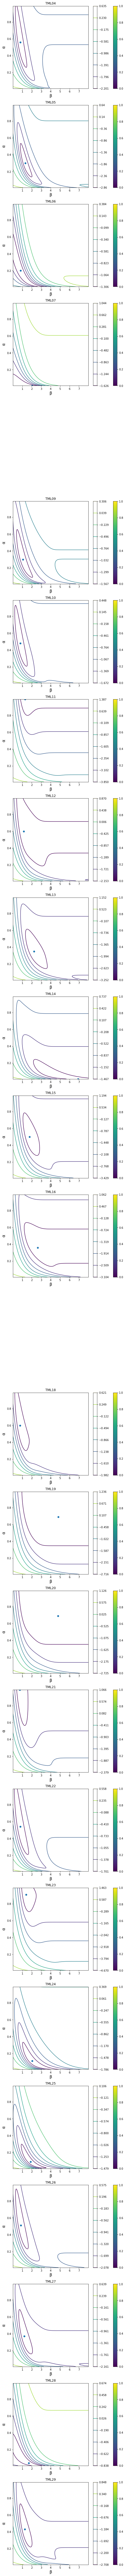

In [424]:
plt.figure(figsize=(8,200))

files = os.listdir('dataset')

for file in files:
    Task2(file)

# Task 3

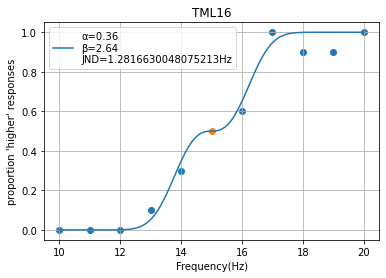

In [436]:
High_rate = []

for freq in range(10, 21):
    
    if (freq == 15):
        continue
    
    else:
        cnt = 0
        decisions = list(TML16[TML16['f1 (Hz)']==freq]['Decision'])
        cnt += decisions.count('before')
        decisions = list(TML16[TML16['f2 (Hz)']==freq]['Decision'])
        cnt += decisions.count('after')
        
        High_rate.append(cnt/10)

freq = np.array([i-15 for i in range(10,21)])
g = 0.5
        
y_original = []

for frequency in range(10, 21):
    
    if (frequency == 15):
        y_original.append(g)
    
    else:
        cnt = 0
        decisions = list(TML16[TML16['f1 (Hz)']==frequency]['Decision'])
        cnt += decisions.count('before')
        decisions = list(TML16[TML16['f2 (Hz)']==frequency]['Decision'])
        cnt += decisions.count('after')
    
        y_original.append(cnt/10)

y_original = np.array(y_original)   
    
def f(x, A, B):
    
    value = []
    
    for i in range(A.shape[0]):
        tmp = []
        for j in range(A.shape[1]):
            
            a = A[i,j]
            b = B[i,j]
            
            if (x < 0):
                tmp.append(g*math.exp(-a*(-x)**b))
            if (x == 0):
                tmp.append(g)
            if (x > 0):
                tmp.append(1-(1-g)*math.exp(-a*x**b))
    
        value.append(tmp)
        
    value = np.array(value)
    return value

    
def sse(N, A, B):
    
    sse = np.zeros_like(A)
    
    for i in range(N):
        sse = sse + (f(freq[i],A,B) - y_original[i])**2
        
    return sse
        
a = np.linspace(0,1,100, endpoint=False)[1:]
b = np.round(np.linspace(0,8,800, endpoint=False)[1:],4)

A, B = np.meshgrid(a, b)

Z = np.log(sse(len(freq), A, B))

a_optimal = A.reshape(A.size,)[np.argmin(Z)]
b_optimal = B.reshape(B.size,)[np.argmin(Z)]

        
        
x = [i for i in range(10,21) if i!=15]
y = High_rate

plt.scatter(x, y)
plt.scatter(15, 0.5)
plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('proportion \'higher\' responses')


X = np.linspace(10,20, 100)

diff = X - 15

y_pred = []

for val in diff:
    result = f(val, np.array([a_optimal]).reshape(1,1), np.array([b_optimal]).reshape(1,1))
    result = float(result.reshape(1,))
    y_pred.append(result)

JND = (np.log(2)/a_optimal)**(1/b_optimal)

plt.plot(X, y_pred, label='\u03B1={}\n\u03B2={}\nJND={}Hz'.format(a_optimal, b_optimal, JND))
plt.title('TML16')
plt.legend(loc='upper left')

### make function of Task 3

In [439]:
def Task3(file):
    
    df = pd.read_csv('dataset/{}'.format(file), sep='\t', header=None)
    df.columns = ['Block', 'Trial', 'f1 (Hz)', 'ISI 1', 'f2 (Hz)', 'ISI 2', 
                 'Decision', 'time', 'ISI 3']
    
    High_rate = []

    for freq in range(10, 21):
    
        if (freq == 15):
            continue
    
        else:
            cnt = 0
            decisions = list(df[df['f1 (Hz)']==freq]['Decision'])
            cnt += decisions.count('before')
            decisions = list(df[df['f2 (Hz)']==freq]['Decision'])
            cnt += decisions.count('after')
        
            High_rate.append(cnt/10)

    freq = np.array([i-15 for i in range(10,21)])
    g = 0.5
        
    y_original = []

    for frequency in range(10, 21):
    
        if (frequency == 15):
            y_original.append(g)
    
        else:
            cnt = 0
            decisions = list(df[df['f1 (Hz)']==frequency]['Decision'])
            cnt += decisions.count('before')
            decisions = list(df[df['f2 (Hz)']==frequency]['Decision'])
            cnt += decisions.count('after')
    
            y_original.append(cnt/10)

    y_original = np.array(y_original)   
    
    def f(x, A, B):
    
        value = []
    
        for i in range(A.shape[0]):
            tmp = []
            for j in range(A.shape[1]):
            
                a = A[i,j]
                b = B[i,j]
            
                if (x < 0):
                    tmp.append(g*math.exp(-a*(-x)**b))
                if (x == 0):
                    tmp.append(g)
                if (x > 0):
                    tmp.append(1-(1-g)*math.exp(-a*x**b))
    
            value.append(tmp)
        
        value = np.array(value)
        return value

    
    def sse(N, A, B):
    
        sse = np.zeros_like(A)
    
        for i in range(N):
            sse = sse + (f(freq[i],A,B) - y_original[i])**2
        
        return sse
        
    a = np.linspace(0,1,100, endpoint=False)[1:]
    b = np.round(np.linspace(0,8,800, endpoint=False)[1:],4)

    A, B = np.meshgrid(a, b)

    Z = np.log(sse(len(freq), A, B))

    a_optimal = A.reshape(A.size,)[np.argmin(Z)]
    b_optimal = B.reshape(B.size,)[np.argmin(Z)]


    
    index = int(file.split('_')[0][-2::])
    plt.subplot(29, 1, index)
    
    
        
    x = [i for i in range(10,21) if i!=15]
    y = High_rate

    plt.scatter(x, y)
    plt.scatter(15, 0.5)
    plt.grid()
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('proportion \'higher\' responses')


    X = np.linspace(10,20, 100)

    diff = X - 15

    y_pred = []

    for val in diff:
        result = f(val, np.array([a_optimal]).reshape(1,1), np.array([b_optimal]).reshape(1,1))
        result = float(result.reshape(1,))
        y_pred.append(result)

    JND = (np.log(2)/a_optimal)**(1/b_optimal)

    plt.plot(X, y_pred, label='\u03B1={}\n\u03B2={}\nJND={}Hz'.format(a_optimal, b_optimal, JND))
    plt.legend(loc='upper left')
    plt.title(file.split('_')[0])

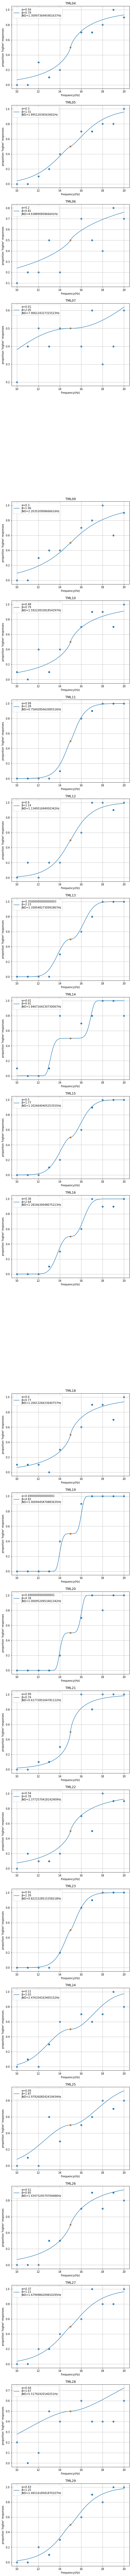

In [440]:
plt.figure(figsize=(8,200))

files = os.listdir('dataset')

for file in files:
    Task3(file)